# 커피빈의 국가별 실적과 멤버십 충성도 분석
2023.10.28 ~ 2023.11.04

## 1. 프로젝트 개요

- **주제: 커피빈의 국가별 실적과 멤버십 충성도 분석**
- 설명: 커피빈의 raw data를 분석하여 판매 실적과 멤버십 현황을 파악하고, 보완 및 발전 방향성 제안
- 사용한 데이터셋
    - [Coffee Bean Sales Raw Dataset](https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset) (Kaggle)
- 진행 절차 및 내용
    - 3가지 데이터셋 각각의 컬럼별 EDA를 통해 분포 및 특성 확인
    - 국가별 원두별 실적 분석을 통해 **고급화 상품 촉진 전략** 제안
    - 멤버십 데이터에 대한 정규성 검정 및 비모수적 검정 수행
    - 멤버십 효용성 미비를 보완할 대책으로 **충성도 제고 전략** 제안
- 사용한 스킬셋
    - Pandas, Numpy
    - Matplotlib
    - Scipy

## 2. 데이터셋 로딩 및 확인

### 2-1. 데이터셋 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfs = {}
for sheet in pd.ExcelFile('Raw Data.xlsx').sheet_names:
    dfs[sheet] = pd.read_excel('Raw Data.xlsx', sheet_name=sheet)

print(len(dfs))

3


In [2]:
dfs.keys()

dict_keys(['orders', 'customers', 'products'])

총 **3개의 시트**로 구성된 데이터이다.

### 2-2. 데이터셋 확인 (orders)

In [6]:
dfs['orders']

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dfs['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 101.7+ KB


In [20]:
# Order Date 연도 분포 보기
dfs['orders']['Order Date'].apply(lambda x:x.year).value_counts().to_frame()

,Order Date
2021,312
2020,263
2019,259
2022,166


2019년부터 2022년까지의 데이터로 확인된다.

In [24]:
# Product ID 분포 보기
dfs['orders']['Product ID'].nunique()

48

유저들이 주문한 상품의 개수는 총 48개

In [25]:
# Quantity 분포 보기
dfs['orders']['Quantity'].value_counts().to_frame()

,Quantity
2,185
6,175
3,174
4,165
5,162
1,139


주문 개수는 1개부터 6개까지

In [29]:
dfs['orders'].isna().sum().to_frame()

,0
Order ID,0
Order Date,0
Customer ID,0
Product ID,0
Quantity,0
Customer Name,1000
Email,1000
Country,1000
Coffee Type,1000
Roast Type,1000


지금 살펴본 것 외에 다른 컬럼들은 전부 null값이 들어있다. 그냥 지워버리면 될 듯

In [3]:
order_df = dfs['orders'].dropna(axis=1)
order_df

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2
...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1


### 2-3. 데이터셋 확인 (customers)

In [33]:
dfs['customers']

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No
996,62494-09113-RP,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No
997,10940-42739-ET,Etan Featenby,NaN,+1 (719) 416-9560,885 Toban Plaza,Colorado Springs,United States,80920,Yes
998,64965-78386-MY,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No


In [34]:
dfs['customers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [35]:
dfs['customers'].isna().sum().to_frame()

,0
Customer ID,0
Customer Name,0
Email,204
Phone Number,130
Address Line 1,0
City,0
Country,0
Postcode,0
Loyalty Card,0


Email과 Phone Number에는 null 값이 있고 나머지는 잘 들어가 있다.

In [39]:
dfs['customers']['City'].value_counts()

Washington       27
Houston          14
New York City    13
El Paso          12
Los Angeles      12
                 ..
Sutton            1
New Brunswick     1
Valleymount       1
Alhambra          1
Oceanside         1
Name: City, Length: 386, dtype: int64

도시가 386개나 된다.

In [40]:
dfs['customers']['Country'].value_counts()

United States     782
Ireland           150
United Kingdom     68
Name: Country, dtype: int64

미국, 아일랜드, 영국의 데이터인 모양이다.

In [41]:
dfs['customers']['Loyalty Card'].value_counts()

No     513
Yes    487
Name: Loyalty Card, dtype: int64

Loyalty Card가 뭔데...?

In [47]:
dfs['customers']['Loyalty Card_b'] = dfs['customers']['Loyalty Card'].apply(lambda x:1 if x == 'Yes' else 0)
dfs['customers']['Loyalty Card_b'].value_counts()

0    513
1    487
Name: Loyalty Card_b, dtype: int64

편하게 컨트롤하기 위해 binary로 바꿔버리고

In [54]:
loyalty_df = dfs['customers'].groupby('Country').agg({
    'Loyalty Card_b': 'sum', 'Loyalty Card': 'count'
}).sort_values('Loyalty Card_b', ascending=False)

loyalty_df

,Loyalty Card_b,Loyalty Card
Country,,
United States,380,782
Ireland,80,150
United Kingdom,27,68


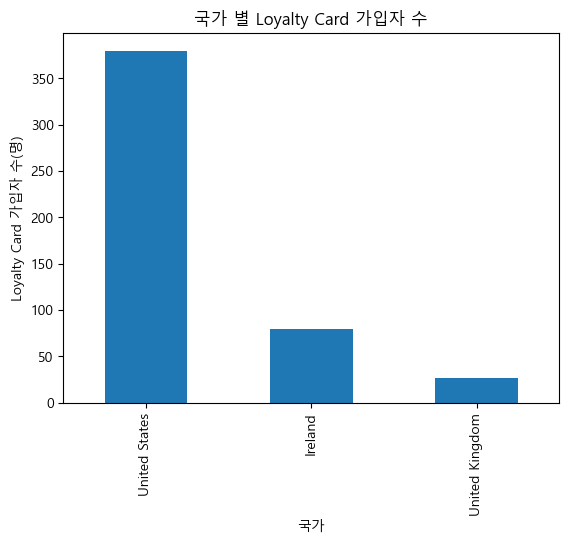

In [61]:
loyalty_df['Loyalty Card_b'].plot(kind='bar')
plt.title('국가 별 Loyalty Card 가입자 수')
plt.xlabel('국가')
plt.ylabel('Loyalty Card 가입자 수(명)')
plt.show()

미국, 아일랜드, 영국 순서로 Loyalty Card 가입자 수가 많다.

In [58]:
loyalty_df['Ratio'] = round(loyalty_df['Loyalty Card_b'] / loyalty_df['Loyalty Card'], 2)
loyalty_df.sort_values('Ratio', ascending=False)

,Loyalty Card_b,Loyalty Card,Ratio
Country,,,
Ireland,80,150,0.53
United States,380,782,0.49
United Kingdom,27,68,0.40


Loyalty Card 가입 비율은 아일랜드, 미국, 영국 순서이다.

### 2-4. 데이터셋 확인 (products)

In [62]:
dfs['products']

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375
5,A-M-0.5,Ara,M,0.5,6.750,1.3500,0.60750
6,A-M-1,Ara,M,1.0,11.250,1.1250,1.01250
7,A-M-2.5,Ara,M,2.5,25.875,1.0350,2.32875
8,A-D-0.2,Ara,D,0.2,2.985,1.4925,0.26865
9,A-D-0.5,Ara,D,0.5,5.970,1.1940,0.53730


In [63]:
dfs['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [64]:
dfs['products']['Coffee Type'].value_counts().to_frame()

,Coffee Type
Ara,12
Rob,12
Lib,12
Exc,12


In [65]:
dfs['products']['Roast Type'].value_counts().to_frame()

,Roast Type
L,16
M,16
D,16


In [66]:
dfs['products']['Size'].value_counts().to_frame()

,Size
0.2,12
0.5,12
1.0,12
2.5,12


Coffee Type 4가지, Roast Type 3가지, Size 4가지가 조합되어 48개의 상품을 구성한다.

내가 보기에 Size의 단위는 L이다. 한국 스타벅스 기준으로 생각해 보면 톨(0.354L), 그란데(0.473L), 벤티(0.591L)이니까 대충 맞지 싶다. 근데 2.5는 뭐야...?

In [67]:
dfs['products'][['Unit Price', 'Price per 100g', 'Profit']].describe()

,Unit Price,Price per 100g,Profit
count,48.000000,48.000000,48.000000
mean,13.046250,1.435087,1.316219
std,9.953578,0.371981,1.161426
min,2.685000,0.823400,0.161100
25%,5.216250,1.191400,0.501300
50%,9.230000,1.370600,0.943800
75%,17.033750,1.659375,1.657700
max,36.455000,2.377500,4.739150


가격 단위는 달러일 것 같다.

In [73]:
coffee_type_df = dfs['products'].groupby('Coffee Type').agg({'Unit Price': 'mean'}).sort_values('Unit Price', ascending=False)
coffee_type_df

,Unit Price
Coffee Type,
Lib,15.1725
Exc,14.2625
Ara,11.9525
Rob,10.7975


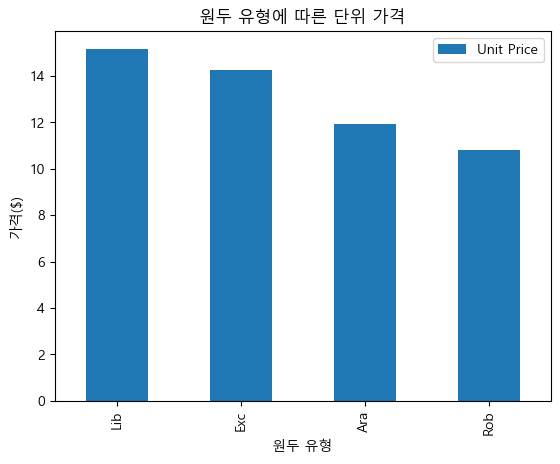

In [75]:
coffee_type_df.plot(kind='bar')
plt.title('원두 유형에 따른 단위 가격')
plt.xlabel('원두 유형')
plt.ylabel('가격($)')
plt.show()

원두는 Lib(리베리카) > Exc(엑셀사) > Ara(아라비카) > Rob(로부스타) 순서로 높은 가격이 책정된다.

In [77]:
roast_type_df = dfs['products'].groupby('Roast Type').agg({'Unit Price': 'mean'}).sort_values('Unit Price', ascending=False)
roast_type_df

,Unit Price
Roast Type,
L,14.59500
M,12.99375
D,11.55000


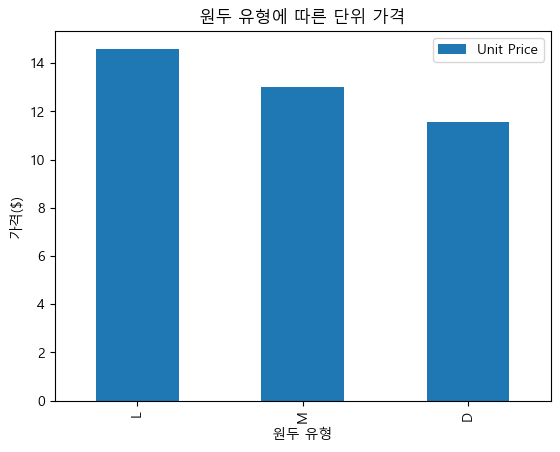

In [78]:
roast_type_df.plot(kind='bar')
plt.title('로스트 유형에 따른 단위 가격')
plt.xlabel('로스트 유형')
plt.ylabel('가격($)')
plt.show()

로스트 유형에는 Light, Medium, Dark가 있다고 한다. Light > Medium > Dark 순서로 높은 단위 가격을 형성한다.

In [84]:
size_df = dfs['products'].groupby('Size').agg({'Unit Price': 'mean', 'Price per 100g': 'mean'}).sort_values('Unit Price', ascending=False).reset_index()
size_df

,Size,Unit Price,Price per 100g
0,2.5,28.5775,1.14310
1,1.0,12.4250,1.24250
2,0.5,7.4550,1.49100
3,0.2,3.7275,1.86375


In [85]:
size_df['Ratio'] = size_df['Unit Price'] / size_df['Size']
size_df

,Size,Unit Price,Price per 100g,Ratio
0,2.5,28.5775,1.14310,11.4310
1,1.0,12.4250,1.24250,12.4250
2,0.5,7.4550,1.49100,14.9100
3,0.2,3.7275,1.86375,18.6375


Ratio를 굳이 구할 필요가 없었네요!

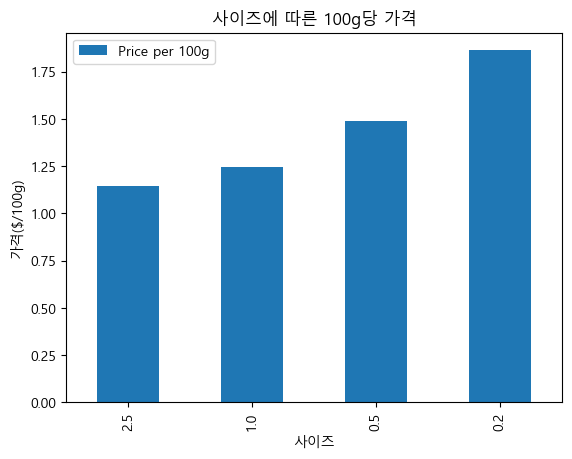

In [90]:
size_df.plot(kind='bar', x='Size', y='Price per 100g')
plt.title('사이즈에 따른 100g당 가격')
plt.xlabel('사이즈')
plt.ylabel('가격($/100g)')
plt.show()

클수록 단위 가격은 싸고 작을수록 단위 가격은 비싸다. 사실 당연한 거긴 하다...!

## 3. 분석 수행

### 3-1. 데이터셋 합치기

In [8]:
# 3개의 데이터셋 합치기
merged_df = pd.merge(
    left = order_df[['Customer ID', 'Product ID', 'Quantity']],
    right = dfs['customers'][['Customer ID', 'Country', 'City', 'Loyalty Card']],
    how = 'left',
    on = 'Customer ID'
)

merged_df = pd.merge(
    left = merged_df,
    right = dfs['products'],
    how = 'left',
    on = 'Product ID'
)

merged_df

,Customer ID,Product ID,Quantity,Country,City,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,17670-51384-MA,R-M-1,2,United States,Paterson,Yes,Rob,M,1.0,9.950,0.9950,0.59700
1,17670-51384-MA,E-M-0.5,5,United States,Paterson,Yes,Exc,M,0.5,8.250,1.6500,0.90750
2,21125-22134-PX,A-L-1,1,United States,San Antonio,Yes,Ara,L,1.0,12.950,1.2950,1.16550
3,23806-46781-OU,E-M-1,2,Ireland,Cill Airne,No,Exc,M,1.0,13.750,1.3750,1.51250
4,23806-46781-OU,R-L-2.5,2,Ireland,Cill Airne,No,Rob,L,2.5,27.485,1.0994,1.64910
...,...,...,...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,R-L-2.5,1,United States,Dallas,No,Rob,L,2.5,27.485,1.0994,1.64910
996,62494-09113-RP,R-M-0.5,5,United States,Fort Smith,No,Rob,M,0.5,5.970,1.1940,0.35820
997,62494-09113-RP,A-M-0.5,4,United States,Fort Smith,No,Ara,M,0.5,6.750,1.3500,0.60750
998,64965-78386-MY,A-D-1,1,United States,Whittier,No,Ara,D,1.0,9.950,0.9950,0.89550


In [9]:
# 주문 당 가격과 주문 당 순익
merged_df['Price by Order'] = merged_df['Unit Price'] * merged_df['Quantity']
merged_df['Profit by Order'] = merged_df['Profit'] * merged_df['Quantity']
merged_df

,Customer ID,Product ID,Quantity,Country,City,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Price by Order,Profit by Order
0,17670-51384-MA,R-M-1,2,United States,Paterson,Yes,Rob,M,1.0,9.950,0.9950,0.59700,19.900,1.19400
1,17670-51384-MA,E-M-0.5,5,United States,Paterson,Yes,Exc,M,0.5,8.250,1.6500,0.90750,41.250,4.53750
2,21125-22134-PX,A-L-1,1,United States,San Antonio,Yes,Ara,L,1.0,12.950,1.2950,1.16550,12.950,1.16550
3,23806-46781-OU,E-M-1,2,Ireland,Cill Airne,No,Exc,M,1.0,13.750,1.3750,1.51250,27.500,3.02500
4,23806-46781-OU,R-L-2.5,2,Ireland,Cill Airne,No,Rob,L,2.5,27.485,1.0994,1.64910,54.970,3.29820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,R-L-2.5,1,United States,Dallas,No,Rob,L,2.5,27.485,1.0994,1.64910,27.485,1.64910
996,62494-09113-RP,R-M-0.5,5,United States,Fort Smith,No,Rob,M,0.5,5.970,1.1940,0.35820,29.850,1.79100
997,62494-09113-RP,A-M-0.5,4,United States,Fort Smith,No,Ara,M,0.5,6.750,1.3500,0.60750,27.000,2.43000
998,64965-78386-MY,A-D-1,1,United States,Whittier,No,Ara,D,1.0,9.950,0.9950,0.89550,9.950,0.89550


In [10]:
# 제품 하나 당 가격에 대한 데이터 삭제
merged_df = merged_df.drop(['Unit Price', 'Price per 100g', 'Profit'], axis=1)
merged_df

,Customer ID,Product ID,Quantity,Country,City,Loyalty Card,Coffee Type,Roast Type,Size,Price by Order,Profit by Order
0,17670-51384-MA,R-M-1,2,United States,Paterson,Yes,Rob,M,1.0,19.900,1.19400
1,17670-51384-MA,E-M-0.5,5,United States,Paterson,Yes,Exc,M,0.5,41.250,4.53750
2,21125-22134-PX,A-L-1,1,United States,San Antonio,Yes,Ara,L,1.0,12.950,1.16550
3,23806-46781-OU,E-M-1,2,Ireland,Cill Airne,No,Exc,M,1.0,27.500,3.02500
4,23806-46781-OU,R-L-2.5,2,Ireland,Cill Airne,No,Rob,L,2.5,54.970,3.29820
...,...,...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,R-L-2.5,1,United States,Dallas,No,Rob,L,2.5,27.485,1.64910
996,62494-09113-RP,R-M-0.5,5,United States,Fort Smith,No,Rob,M,0.5,29.850,1.79100
997,62494-09113-RP,A-M-0.5,4,United States,Fort Smith,No,Ara,M,0.5,27.000,2.43000
998,64965-78386-MY,A-D-1,1,United States,Whittier,No,Ara,D,1.0,9.950,0.89550


### 3-2. 판매가 잘 되고 있는 국가 알아보기

In [130]:
total_sales_by_country = merged_df.groupby('Country').agg({
    'Customer ID': 'count', 'Quantity': 'sum', 'Price by Order': 'sum', 'Profit by Order': 'sum'
}).rename(columns={
    'Customer ID': 'Counts', 'Quantity': 'Total Sales', 'Price by Order': 'Gross Profit', 'Profit by Order': 'Net Income'
}).sort_values('Gross Profit', ascending=False)

total_sales_by_country

,Counts,Total Sales,Gross Profit,Net Income
Country,,,,
United States,774,2760,35638.885,3564.46305
Ireland,153,537,6696.865,670.94950
United Kingdom,73,254,2798.505,284.80485


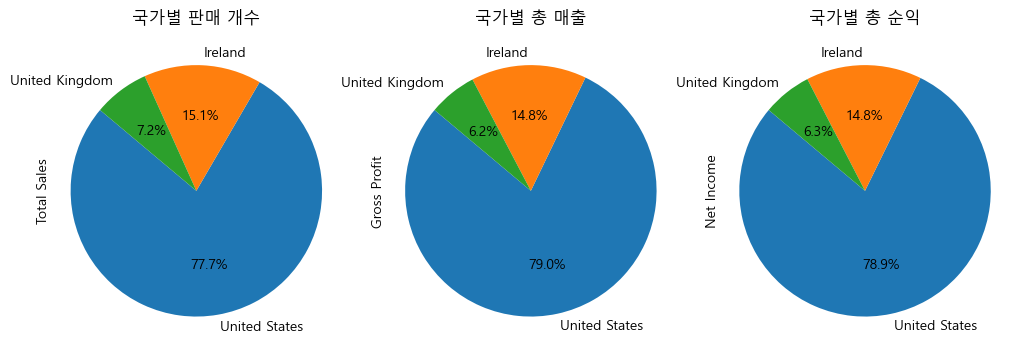

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
titles = ['국가별 판매 개수', '국가별 총 매출', '국가별 총 순익']

for i in range(1, len(total_sales_by_country.columns)):
    total_sales_by_country.iloc[:, i].to_frame().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        legend=None,
        subplots=True,
        ax=axes[i - 1]
    )
    axes[i - 1].set_title(titles[i - 1])
    axes[i - 1].axis('equal')

plt.show()

전체 판매 개수, 매출, 순익의 부분에서 확인해 본 결과, 커피빈의 실적에서 가장 큰 부분을 차지하는 국가는 **미국**임을 확인할 수 있었다. 아일랜드와 영국이 그 뒤를 잇기는 하나, 그 두 국가를 합쳐도 전체 실적의 1/4에도 못 미침을 파악할 수 있었다.

In [111]:
avg_sales_by_country = merged_df.groupby('Country').agg({
    'Quantity': 'mean', 'Price by Order': 'mean', 'Profit by Order': 'mean'
}).rename(columns={
    'Quantity': 'Quantity by Order'
}).sort_values('Profit by Order', ascending=False)

avg_sales_by_country

,Quantity by Order,Price by Order,Profit by Order
Country,,,
United States,3.565891,46.045071,4.605249
Ireland,3.509804,43.770359,4.385291
United Kingdom,3.479452,38.335685,3.901436


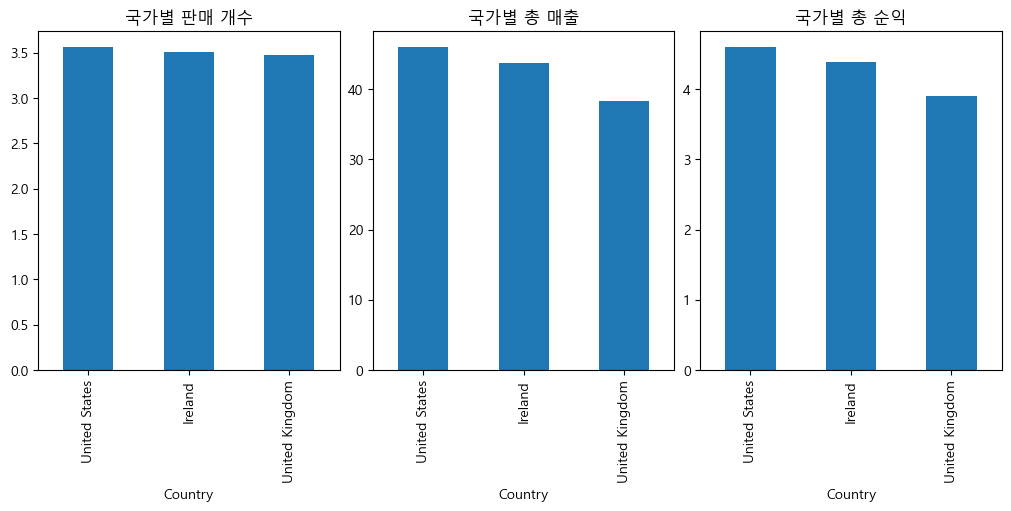

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), constrained_layout=True)
titles = ['국가별 판매 개수', '국가별 총 매출', '국가별 총 순익']

for i in range(len(avg_sales_by_country.columns)):
    avg_sales_by_country.iloc[:, i].to_frame().plot(
        kind='bar',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(titles[i])

plt.show()

주문 1회당 실적 역시 **미국에서 가장 높음**을 확인할 수 있었다.

하지만 앞서 살펴본 커피빈 전체 실적에서 압도적인 차이가 났던 것에 비하면 꽤 비등비등한 결과다. 미국에서의 호성적이 단가 차이보다는 **절대적인 주문량 수 차이**에서 기인했을 확인할 수 있는 대목이다.

### 3-3. 국가별 원두별 선호도 및 실적

#### 3-3-1. 미국

In [136]:
total_coffee_preference_us = merged_df[merged_df['Country'] == 'United States'].groupby('Coffee Type').agg({
    'Customer ID': 'count', 'Quantity': 'sum', 'Price by Order': 'sum', 'Profit by Order': 'sum'
}).rename(columns={
    'Customer ID': 'Counts', 'Quantity': 'Total Sales', 'Price by Order': 'Total Profit', 'Profit by Order': 'Net Income'
}).sort_values('Total Profit', ascending=False)

total_coffee_preference_us

,Counts,Total Sales,Total Profit,Net Income
Coffee Type,,,,
Ara,216,779,10141.010,912.69090
Exc,189,681,9823.510,1080.58610
Lib,188,648,9010.345,1171.34485
Rob,181,652,6664.020,399.84120


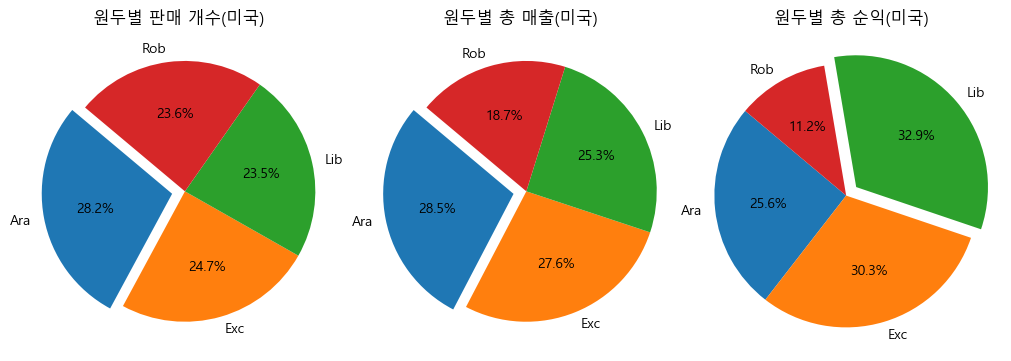

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
titles = ['원두별 판매 개수(미국)', '원두별 총 매출(미국)', '원두별 총 순익(미국)']

for i in range(1, len(total_coffee_preference_us.columns)):
    data = total_coffee_preference_us.iloc[:, i].to_frame()
    max_row_number = data.index.get_loc(data.idxmax().values[0])
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        startangle=140,
        legend=None,
        subplots=True,
        ax=axes[i - 1],
        explode=[0.1 if i == max_row_number else 0 for i in range(len(total_coffee_preference_us.columns))]
    )
    axes[i - 1].set_title(titles[i - 1])
    axes[i - 1].axis('equal')

plt.show()

Ara(아라비카) 원두가 가장 많은 판매 개수와 매출을 보이지만, 순익 측면에서 봤을 때에는 Lib(리베리카)가 더 높은 비중을 보인다는 점이 인상적이다. 절대적인 매출액보다, **원두별 가격 및 원가**의 차이가 더 비중 높게 반영된 결과라고 할 수 있다.

#### 3-3-2. 아일랜드

In [160]:
total_coffee_preference_irl = merged_df[merged_df['Country'] == 'Ireland'].groupby('Coffee Type').agg({
    'Customer ID': 'count', 'Quantity': 'sum', 'Price by Order': 'sum', 'Profit by Order': 'sum'
}).rename(columns={
    'Customer ID': 'Counts', 'Quantity': 'Total Sales', 'Price by Order': 'Total Profit', 'Profit by Order': 'Net Income'
}).sort_values('Total Profit', ascending=False)

total_coffee_preference_irl

,Counts,Total Sales,Total Profit,Net Income
Coffee Type,,,,
Lib,39,130,2166.585,281.65605
Rob,38,142,1636.625,98.19750
Exc,35,118,1533.350,168.66850
Ara,41,147,1360.305,122.42745


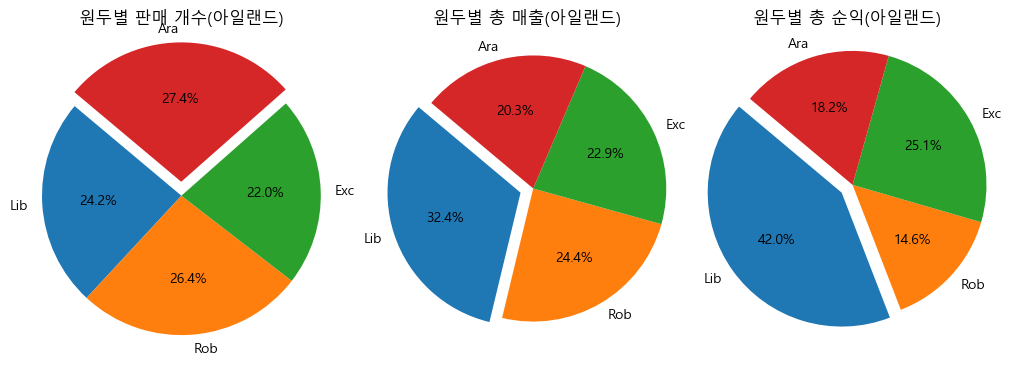

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
titles = ['원두별 판매 개수(아일랜드)', '원두별 총 매출(아일랜드)', '원두별 총 순익(아일랜드)']

for i in range(1, len(total_coffee_preference_irl.columns)):
    data = total_coffee_preference_irl.iloc[:, i].to_frame()
    max_row_number = data.index.get_loc(data.idxmax().values[0])
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        startangle=140,
        legend=None,
        subplots=True,
        ax=axes[i - 1],
        explode=[0.1 if i == max_row_number else 0 for i in range(len(total_coffee_preference_irl.columns))]
    )
    axes[i - 1].set_title(titles[i - 1])
    axes[i - 1].axis('equal')

plt.show()

이번에도 역시 **단위 당 가격이 높은** Lib(리베리카) 원두의 매출 및 순익 비중이 훨씬 높게 나왔다.

#### 3-3-3. 영국

In [162]:
total_coffee_preference_uk = merged_df[merged_df['Country'] == 'United Kingdom'].groupby('Coffee Type').agg({
    'Customer ID': 'count', 'Quantity': 'sum', 'Price by Order': 'sum', 'Profit by Order': 'sum'
}).rename(columns={
    'Customer ID': 'Counts', 'Quantity': 'Total Sales', 'Price by Order': 'Total Profit', 'Profit by Order': 'Net Income'
}).sort_values('Total Profit', ascending=False)

total_coffee_preference_uk

,Counts,Total Sales,Total Profit,Net Income
Coffee Type,,,,
Exc,23,73,949.580,104.45380
Lib,21,76,877.145,114.02885
Rob,22,84,704.600,42.27600
Ara,7,21,267.180,24.04620


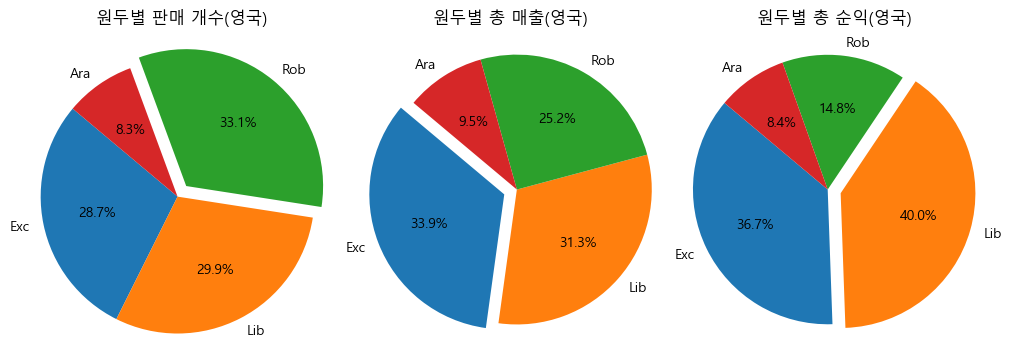

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), constrained_layout=True)
titles = ['원두별 판매 개수(영국)', '원두별 총 매출(영국)', '원두별 총 순익(영국)']

for i in range(1, len(total_coffee_preference_uk.columns)):
    data = total_coffee_preference_uk.iloc[:, i].to_frame()
    max_row_number = data.index.get_loc(data.idxmax().values[0])
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        startangle=140,
        legend=None,
        subplots=True,
        ax=axes[i - 1],
        explode=[0.1 if i == max_row_number else 0 for i in range(len(total_coffee_preference_uk.columns))]
    )
    axes[i - 1].set_title(titles[i - 1])
    axes[i - 1].axis('equal')

plt.show()

영국은 특이하게도 Ara(아라비카) 원두가 압도적으로 고전하는 모습을 보인다. 전체 판매 개수 측면에서는 단위 가격이 가장 싸게 책정된 Rob(로부스타)가 우세하지만, 순익 면에서는 역시 **가장 고급 원두**인 Lib(리베리카)가 우월하다.

#### 3-3-4. 종합

각 국가별로 살펴본 결과 판매 개수 면에서는 Ara(아라비카), Rob(로부스타) 등 단위 가격이 싼 제품군이 우세한 모습을 보였다. 반면 순익 측면에서는 Lib(리베리카), Exc(엑셀사) 등 단위 가격이 비싼 제품군이 더 좋은 추이를 보였다. 일반적으로 **값이 비싼 제품군에서 더 높은 마진**을 책정하기 때문인 것으로 분석할 수 있겠다.

고급 원두에서 높은 수익률을 기대할 수 있는 만큼, **커피의 고급화 상품 촉진**을 주요 마케팅 전략으로 수립하는 것이 유리할 수 있겠다. 특히 영국을 제외한 두 국가에서는 저가 제품군의 판매량이 고가 제품군의 판매량보다 높다. 따라서 저가 제품군의 소비자들을 고가 제품군으로 이동시키는 데에 주안을 두고 마케팅 활동을 펼친다면 지금보다 더 높은 실적을 기록할 수 있으리라고 기대해 본다.

### 3-4. Loyalty Card 가입자 충성도 분석

#### 3-4-1. 데이터 준비

커피빈의 멤버십 상품인 Loyalty Card 가입자에 대한 분석을 진행한다.

기존의 데이터는 주문 단위로 되어있으나, 본 분석을 위해서는 **이용자 단위**로 재집계가 필요하다.

In [178]:
customer_duplicated = merged_df.groupby('Customer ID').agg({
    'Profit by Order': 'count', 'Quantity': 'sum', 'Price by Order': 'sum'
}).rename(columns={
    'Profit by Order': 'Order Count', 'Quantity': 'Total Sales', 'Price by Order': 'Total Profit'
})

customer_duplicated = pd.merge(
    left=customer_duplicated,
    right=merged_df[['Customer ID', 'Loyalty Card']],
    how='left',
    on='Customer ID'
)

customer_duplicated

,Customer ID,Order Count,Total Sales,Total Profit,Loyalty Card
0,00246-15080-LE,1,6,178.710,No
1,00256-19905-YG,1,6,40.500,No
2,00445-42781-KX,4,16,163.720,Yes
3,00445-42781-KX,4,16,163.720,Yes
4,00445-42781-KX,4,16,163.720,Yes
...,...,...,...,...,...
995,99643-51048-IQ,1,6,20.250,No
996,99735-44927-OL,1,3,41.250,Yes
997,99869-55718-UU,1,4,10.740,Yes
998,99899-54612-NX,1,2,66.930,No


In [179]:
loyalty_total = customer_duplicated.groupby('Loyalty Card').agg({
    'Customer ID': 'count', 'Order Count': 'mean', 'Total Sales': 'mean', 'Total Profit': 'mean'
})

loyalty_total

,Customer ID,Order Count,Total Sales,Total Profit
Loyalty Card,,,,
No,521,1.310940,4.831094,60.198676
Yes,479,1.279749,4.319415,55.174113


멤버십 가입자들의 평균 주문 횟수, 평균 주문 개수, 평균 소비 금액 지표가 비가입자들의 지표보다 낮은 점을 확인해 볼 수 있다. 충성도 높은 고객을 충분히 포섭하지 못한 것으로 예상해 볼 수 있다. 다만 **이 차이가 유의미한 것인지**에 대한 통계적 검정을 진행해 볼 필요가 있겠다.

#### 3-4-2. 정규성 검정

우선 데이터의 정규성 검정을 시행하여, 정규성을 만족한다면 t검정을, 만족하지 않는다면 비모수적 검정 방법을 채택한다.

In [184]:
from scipy import stats

# 멤버십 가입자와 비가입자 데이터 분리
loyal_members_data = customer_duplicated[customer_duplicated['Loyalty Card'] == 'Yes']
non_loyal_members_data = customer_duplicated[customer_duplicated['Loyalty Card'] == 'No']

# 정규성 검정 함수
def perform_shapiro_wilk_normality_test(data, group_name, alpha=0.05):
    stat, p = stats.shapiro(data)
    if p < alpha:
        print(f"Shapiro-Wilk 정규성 검정 결과 for {group_name}: 정규성 위반")
    else:
        print(f"Shapiro-Wilk 정규성 검정 결과 for {group_name}: 정규성 만족")
    
# 멤버십 가입자 데이터에 대한 정규성 검정
perform_shapiro_wilk_normality_test(loyal_members_data['Order Count'], "멤버십 가입자 1인당 주문 횟수")
perform_shapiro_wilk_normality_test(loyal_members_data['Total Sales'], "멤버십 가입자 1인당 구매 개수")
perform_shapiro_wilk_normality_test(loyal_members_data['Total Profit'], "멤버십 가입자 1인당 사용 금액")

# 멤버십 비가입자 데이터에 대한 정규성 검정
perform_shapiro_wilk_normality_test(non_loyal_members_data['Total Sales'], "멤버십 비가입자 1인당 주문 횟수")
perform_shapiro_wilk_normality_test(non_loyal_members_data['Total Sales'], "멤버십 비가입자 1인당 구매 개수")
perform_shapiro_wilk_normality_test(non_loyal_members_data['Total Profit'], "멤버십 비가입자 1인당 사용 금액")

Shapiro-Wilk 정규성 검정 결과 for 멤버십 가입자 1인당 주문 횟수: 정규성 위반
Shapiro-Wilk 정규성 검정 결과 for 멤버십 가입자 1인당 구매 개수: 정규성 위반
Shapiro-Wilk 정규성 검정 결과 for 멤버십 가입자 1인당 사용 금액: 정규성 위반
Shapiro-Wilk 정규성 검정 결과 for 멤버십 비가입자 1인당 주문 횟수: 정규성 위반
Shapiro-Wilk 정규성 검정 결과 for 멤버십 비가입자 1인당 구매 개수: 정규성 위반
Shapiro-Wilk 정규성 검정 결과 for 멤버십 비가입자 1인당 사용 금액: 정규성 위반


모든 데이터가 정규성을 만족하지 않기 때문에 비모수적 검정 방법을 수행하는 것이 타당하다.

#### 3-4-3. Mann-Whitney U 검정

In [186]:
# Mann-Whitney U 검정 수행
_, p_value_orders = stats.mannwhitneyu(loyal_members_data['Order Count'], non_loyal_members_data['Total Sales'])
_, p_value_sales = stats.mannwhitneyu(loyal_members_data['Total Sales'], non_loyal_members_data['Total Sales'])
_, p_value_profit = stats.mannwhitneyu(loyal_members_data['Total Profit'], non_loyal_members_data['Total Profit'])

print("두 그룹의 1인당 주문 횟수에", end=' ')
print("유의한 차이가 있음" if p_value_orders < 0.05 else "차이가 없음")

print("두 그룹의 1인당 구매 개수에", end=' ')
print("유의한 차이가 있음" if p_value_sales < 0.05 else "차이가 없음")

print("두 그룹의 1인당 사용 금액에", end=' ')
print("유의한 차이가 있음" if p_value_profit < 0.05 else "차이가 없음")

두 그룹의 1인당 주문 횟수에 유의한 차이가 있음
두 그룹의 1인당 구매 개수에 차이가 없음
두 그룹의 1인당 사용 금액에 유의한 차이가 있음


검정 결과, **주문 횟수와 사용 금액**에서 두 그룹 간의 유의한 차이가 있다. 커피빈을 이용하는 빈도가 높은 고객들이 Loyalty Card 멤버십에 가입하지 않고 미가입 상태로 남아있는 비중이 높다는 사실을 짐작할 수 있다.

사용자들이 Loyalty Card의 혜택에 별다른 효용을 느끼지 못할 가능성이 크다. 커피빈이 멤버십 가입자를 강화하려면 사용자들이 멤버십을 매력적으로 느끼게끔 만들 필요가 있다. 다양한 혜택을 제공하여 **충성도 높은 멤버십 가입자를 끌어모으는 전략**을 고려해 보아야 할 것이다. 예를 들어 멤버십 포인트 적립, 할인 쿠폰 증정, 실적에 따라 등급으로 나누어 추가 혜택 증정 등을 고안해 볼 수 있겠다.